In [105]:
pip install ucimlrepo

In [106]:
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim
import torchvision
import torch.nn.functional as M
from sklearn.preprocessing import LabelEncoder, StandardScaler
from ucimlrepo import fetch_ucirepo

In [107]:
# fetching database
drybean = fetch_ucirepo(id=602)


x = drybean.data.features
y = drybean.data.targets

In [108]:
x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [109]:
y

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

#converting the y text data into numerical data
encoder = LabelEncoder()
numerical_y = encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
# Convert to PyTorch tensors
x_tensor = torch.tensor(normalized_x, dtype=torch.float32)
y_tensor = torch.nn.functional.one_hot(torch.tensor(numerical_y), num_classes=len(set(numerical_y)))

print("x tensor shape: ", x_tensor.shape)
print("y tensor shape: ", y_tensor.shape)

x tensor shape:  torch.Size([13611, 16])
y tensor shape:  torch.Size([13611, 7])


In [112]:
from sklearn.model_selection import train_test_split
#Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, numerical_y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

#Normalize the features
scaler = Normalizer()
x_train_normalized = scaler.fit_transform(x_train)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)

normalized_x = scaler.fit_transform(x)


In [113]:
import torch
from torch.utils.data import TensorDataset, DataLoader

#Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

#Create DataLoader for all three datasets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [114]:
learning_rate = 0.003
batch_size = 64
epochs = 50

In [115]:
#Set random seed for reproducibility
torch.manual_seed(51)

class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3,output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

#Instantiate the model
input_size = x_train.shape[1]
hidden_size1 = 30
hidden_size2 = 30
hidden_size3 = 30
output_size = len(set(numerical_y))  # Adjust output_size based on the number of classes
print(input_size)
print(output_size)
model = MLPModel(input_size, hidden_size1,hidden_size2,hidden_size3, output_size)


#Initializing the loss function, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


16
7


In [116]:
model

MLPModel(
  (fc1): Linear(in_features=16, out_features=30, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=30, out_features=30, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=30, out_features=7, bias=True)
)

In [117]:
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for data, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for data, labels in val_loader:
            outputs = model(data)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()

    # Calculate average validation loss for the epoch
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
    # Save the model for each epoch
    torch.save(model.state_dict(), f'mlp_model_epoch_{epoch}.pth')


Epoch [1/50], Train Loss: 66.9286, Val Loss: 19.5818
Epoch [2/50], Train Loss: 17.5005, Val Loss: 23.5376
Epoch [3/50], Train Loss: 6.7998, Val Loss: 2.3501
Epoch [4/50], Train Loss: 3.9617, Val Loss: 2.0136
Epoch [5/50], Train Loss: 3.0498, Val Loss: 5.3912
Epoch [6/50], Train Loss: 3.0669, Val Loss: 1.9188
Epoch [7/50], Train Loss: 2.7827, Val Loss: 2.7649
Epoch [8/50], Train Loss: 2.0870, Val Loss: 2.9908
Epoch [9/50], Train Loss: 2.1987, Val Loss: 2.2828
Epoch [10/50], Train Loss: 2.0981, Val Loss: 2.3622
Epoch [11/50], Train Loss: 1.9775, Val Loss: 1.9024
Epoch [12/50], Train Loss: 1.8567, Val Loss: 2.4266
Epoch [13/50], Train Loss: 1.7572, Val Loss: 1.7450
Epoch [14/50], Train Loss: 1.6322, Val Loss: 1.9300
Epoch [15/50], Train Loss: 1.7275, Val Loss: 1.9354
Epoch [16/50], Train Loss: 1.6238, Val Loss: 1.6801
Epoch [17/50], Train Loss: 1.6578, Val Loss: 1.9685
Epoch [18/50], Train Loss: 1.5194, Val Loss: 1.4368
Epoch [19/50], Train Loss: 1.4739, Val Loss: 1.5251
Epoch [20/50], Tr

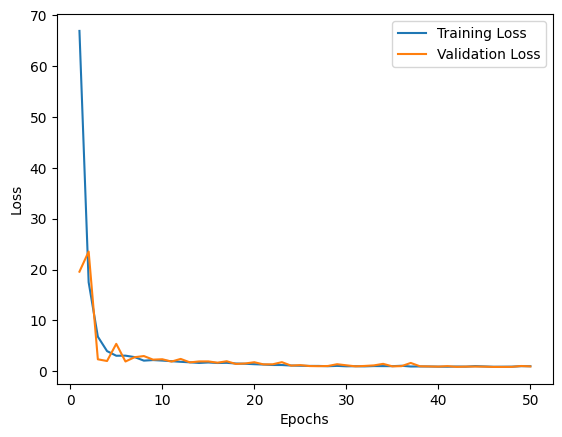

In [118]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [119]:
# Find the epoch with the minimum validation loss
best_epoch = val_losses.index(min(val_losses))

# Load the model with the minimum validation loss
best_model = MLPModel(input_size, hidden_size1,hidden_size2,hidden_size3, output_size)
best_model.load_state_dict(torch.load(f'mlp_model_epoch_{best_epoch}.pth'))

# Test loop with the best model
best_model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data, labels in test_loader:
        outputs = best_model(data)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = correct_test / total_test
print(f'Best Model Test Accuracy: {test_accuracy * 100:.2f}%')


Best Model Test Accuracy: 60.08%
